In [22]:
DIR='/Users/ravali/Desktop'
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
ratings = pd.read_csv(DIR+'/ratings.csv', delimiter=',')
links = pd.read_csv(DIR+'/links.csv', delimiter=',')
tags = pd.read_csv(DIR+'/tags.csv', delimiter=',')
movies = pd.read_csv(DIR+'/movies.csv', delimiter=',')
#display(ratings.head())
#display(links.head())
#display(tags.head())
#display(movies.head())
df_merged121=pd.merge(ratings, tags, on=['userId','movieId'], how='inner')
#display(df_merged121)

df_dropped=df_merged121.drop(['timestamp_x', 'timestamp_y'], axis=1)
#display(df_dropped)
df_merged3=pd.merge(df_dropped,movies, on=['movieId'], how='inner')
#display(df_merged3)
df_mergedfinal=pd.merge(df_merged3,links, on=['movieId'], how='inner')
#display(df_mergedfinal)
df_final2=df_mergedfinal.drop(['imdbId','tmdbId'],axis=1)
#display(df_final)
#print(df_final.dtypes)
obj_df1 = df_final2.select_dtypes(include=['object']).copy()
obj_df1.head()
obj_df1["tag"] = obj_df1["tag"].astype('category')
obj_df1["tag"] = obj_df1["tag"].cat.codes
obj_df1["title"] = obj_df1["title"].astype('category')
obj_df1["title"] = obj_df1["title"].cat.codes
obj_df1["genres"] = obj_df1["genres"].astype('category')
obj_df1["genres"] = obj_df1["genres"].cat.codes
#display(obj_df1)
#display(df_final)
df_final2=df_final2.drop(['tag','title','genres'],axis=1)
display(df_final2)

,userId,movieId,rating
0,2,60756,5.0
1,2,60756,5.0
2,2,60756,5.0
3,62,60756,3.5
4,62,60756,3.5
5,62,60756,3.5
6,424,60756,4.0
7,424,60756,4.0
8,2,89774,5.0
9,2,89774,5.0


In [24]:
df_final3 = pd.concat([df_final2, obj_df1], axis=1)
display(df_final3)

,userId,movieId,rating,tag,title,genres
0,2,60756,5.0,911,1232,216
1,2,60756,5.0,227,1232,216
2,2,60756,5.0,1528,1232,216
3,62,60756,3.5,746,1232,216
4,62,60756,3.5,911,1232,216
5,62,60756,3.5,1528,1232,216
6,424,60756,4.0,911,1232,216
7,424,60756,4.0,1528,1232,216
8,2,89774,5.0,72,1396,291
9,2,89774,5.0,316,1396,291


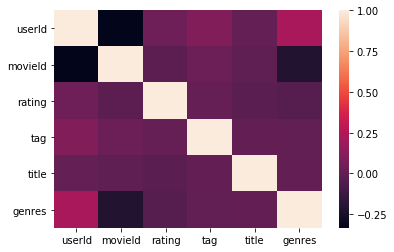

In [28]:
import seaborn as sns
corr = df_final3.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values)

In [26]:
corr.style.background_gradient()


,userId,movieId,rating,tag,title,genres
userId,1,-0.333151,0.0430017,0.102346,0.0141757,0.221959
movieId,-0.333151,1,-0.0118013,0.0320036,-0.000197065,-0.213147
rating,0.0430017,-0.0118013,1,0.0203991,-0.0184046,-0.0362946
tag,0.102346,0.0320036,0.0203991,1,0.00694488,0.000620484
title,0.0141757,-0.000197065,-0.0184046,0.00694488,1,0.00641851
genres,0.221959,-0.213147,-0.0362946,0.000620484,0.00641851,1
